In [1]:
import numpy as np

In [4]:
X = 2 * np.random.rand(100,1)
X[:5]

array([[1.86061215],
       [0.00981056],
       [1.25132378],
       [0.94414015],
       [1.12674231]])

In [6]:
print(np.random.randn(100,1)[:5])
y = 4 + 3 * X + np.random.randn(100,1) #the last part is the noise

[[-0.45862827]
 [-0.39764864]
 [-0.72707578]
 [ 0.99019673]
 [-0.39881232]]


In [7]:
y[:5]

array([[8.45178156],
       [4.02358102],
       [7.33164129],
       [6.03640098],
       [5.35893297]])

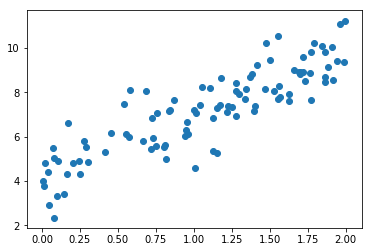

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

In [13]:
X[:5]

array([[1.86061215],
       [0.00981056],
       [1.25132378],
       [0.94414015],
       [1.12674231]])

In [14]:
X_b = np.c_[np.ones((100,1)),X]

In [15]:
X_b[:5]

array([[1.        , 1.86061215],
       [1.        , 0.00981056],
       [1.        , 1.25132378],
       [1.        , 0.94414015],
       [1.        , 1.12674231]])

In [16]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [17]:
theta_best[:5]

array([[4.19810499],
       [2.7948553 ]])

In [18]:
theta_best

array([[4.19810499],
       [2.7948553 ]])

In [20]:
X_new = np.array([[0],[2]])

In [21]:
X_new

array([[0],
       [2]])

In [23]:
X_new_b = np.c_[np.ones((2,1)), X_new] # adding x0 to each column

In [24]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [25]:
y_predict = X_new_b.dot(theta_best)

In [26]:
y_predict

array([[4.19810499],
       [9.7878156 ]])

In [27]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [30]:
theta_best

array([[4.19810499],
       [2.7948553 ]])

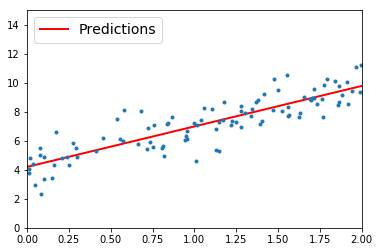

In [55]:
plt.plot(X_new, y_predict, 'r-', linewidth=2, label="Predictions") 
plt.plot(X,y, '.') #the third parameter is what kind of line to use, or what kind of plot
plt.axis([0,2,0,15])
plt.legend(loc="upper left", fontsize=14) #you have to label the data first to get the legend working
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lin_reg = LinearRegression()

In [58]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
lin_reg.intercept_, lin_reg.coef_

(array([4.19810499]), array([[2.7948553]]))

In [60]:
lin_reg.predict(X_new)

array([[4.19810499],
       [9.7878156 ]])

In [86]:
eta = 0.1

In [87]:
n_iterations = 1000

In [88]:
m = 100

In [89]:
theta = np.random.randn(2,1)

In [90]:
theta

array([[ 0.48718816],
       [-0.6440617 ]])

In [91]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [92]:
theta 

array([[4.19810499],
       [2.7948553 ]])

In [93]:
n_epochs = 50

In [94]:
t0, t1 = 5, 50

In [95]:
def learning_schedule(t):
    return t0/(t+t1)

In [96]:
theta = np.random.randn(2,1)

In [97]:
theta

array([[ 0.83443584],
       [-0.23115473]])

In [99]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

In [100]:
theta

array([[4.23054935],
       [2.74221953]])

In [101]:
from sklearn.linear_model import SGDRegressor

In [102]:
sgd_reg = SGDRegressor(max_iter=1000, tol = 1e-3, penalty=None, eta0=0.1)

In [103]:
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [105]:
y[:10]

array([[8.45178156],
       [4.02358102],
       [7.33164129],
       [6.03640098],
       [5.35893297],
       [9.4303458 ],
       [3.34529767],
       [7.2202605 ],
       [6.85041871],
       [8.6478663 ]])

In [106]:
y.ravel()

array([ 8.45178156,  4.02358102,  7.33164129,  6.03640098,  5.35893297,
        9.4303458 ,  3.34529767,  7.2202605 ,  6.85041871,  8.6478663 ,
        6.5974991 ,  7.43728551,  8.04450121,  8.12030697,  9.59621228,
        7.65754524,  3.79259977,  7.47311116,  4.81175964,  7.37481768,
        8.24958259,  9.82811764,  4.91536558,  8.51644071,  2.34822285,
       11.08028691,  8.16444025,  4.85543313,  4.90152691,  5.28199621,
        8.18769423,  5.53385251,  7.39473629,  9.39453345,  9.01612523,
        5.30764776,  5.50577133,  4.32652957,  7.9360091 , 10.25077681,
        6.84128599,  6.32063398,  4.39460345,  7.93021218,  4.83440527,
        5.82860899,  6.65537783,  6.12599481,  7.77951098,  5.04367774,
        6.10950678,  8.92416339,  8.54268193,  8.13948316,  8.92703313,
        5.61120263,  7.61833583,  7.10689468, 10.54216969,  7.19576389,
        7.15775262,  8.07613444,  9.80405396,  2.9283249 ,  6.92572609,
        7.30985314,  9.47567386,  8.71132161,  5.93093646,  7.70

In [107]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.12877928]), array([2.7677499]))

In [108]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

In [109]:
X[:10]

array([[-0.51604527],
       [-0.50089758],
       [ 0.55717601],
       [-2.35574519],
       [ 0.6668578 ],
       [ 1.62109268],
       [-2.09558404],
       [ 2.14860764],
       [-0.38433736],
       [ 2.5584118 ]])

In [110]:
y[:10]

array([[2.89176228],
       [2.74280122],
       [1.49998114],
       [2.86467493],
       [4.2710608 ],
       [5.20377587],
       [1.35565137],
       [5.65371676],
       [3.5556226 ],
       [7.69099187]])

Text(0, 0.5, 'y')

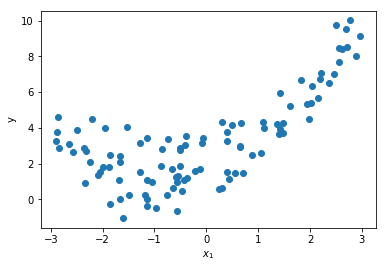

In [113]:
plt.plot(X,y, "o")
plt.xlabel('$x_1$')
plt.ylabel('y')

In [114]:
from sklearn.preprocessing import PolynomialFeatures

In [115]:
poly_features = PolynomialFeatures(degree = 2, include_bias= False)

In [116]:
X_poly = poly_features.fit_transform(X)

In [117]:
polyyyyy = PolynomialFeatures(degree = 4, include_bias=True)

In [118]:
XXXXX = polyyyyy.fit_transform(X)

In [119]:
XXXXX[0]

array([ 1.        , -0.51604527,  0.26630272, -0.13742426,  0.07091714])

In [120]:
lin_reg = LinearRegression()

In [121]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
lin_reg.intercept_, lin_reg.coef_

(array([1.88036021]), array([[1.00317323, 0.54101989]]))

Text(0, 0.5, 'y')

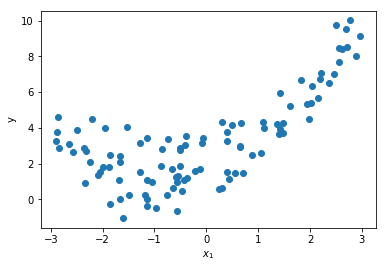

In [123]:
plt.plot(X,y, "o")
plt.xlabel('$x_1$')
plt.ylabel('y')

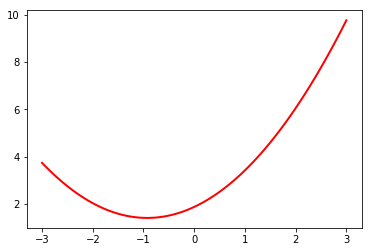

In [124]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label="Predictions") 


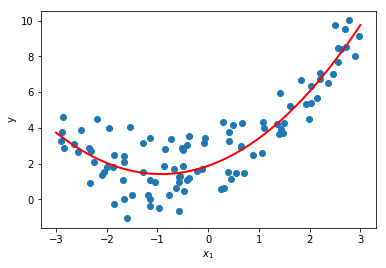

In [125]:
plt.plot(X,y, "o")
plt.xlabel('$x_1$')
plt.ylabel('y')
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label="Predictions") 

In [128]:
poly_features2 = PolynomialFeatures(degree = 5, include_bias= False)

In [129]:
X[:10]

array([[-0.51604527],
       [-0.50089758],
       [ 0.55717601],
       [-2.35574519],
       [ 0.6668578 ],
       [ 1.62109268],
       [-2.09558404],
       [ 2.14860764],
       [-0.38433736],
       [ 2.5584118 ]])

In [133]:
poly_features2.fit_transform(X)[:10]

array([[-5.16045274e-01,  2.66302724e-01, -1.37424262e-01,
         7.09171410e-02, -3.65964554e-02],
       [-5.00897583e-01,  2.50898389e-01, -1.25674397e-01,
         6.29500017e-02, -3.15315037e-02],
       [ 5.57176006e-01,  3.10445101e-01,  1.72972561e-01,
         9.63761609e-02,  5.36984843e-02],
       [-2.35574519e+00,  5.54953542e+00, -1.30732914e+01,
         3.07973434e+01, -7.25506936e+01],
       [ 6.66857804e-01,  4.44699330e-01,  2.96551219e-01,
         1.97757494e-01,  1.31876128e-01],
       [ 1.62109268e+00,  2.62794148e+00,  4.26013670e+00,
         6.90607642e+00,  1.11953899e+01],
       [-2.09558404e+00,  4.39147247e+00, -9.20269962e+00,
         1.92850304e+01, -4.04134020e+01],
       [ 2.14860764e+00,  4.61651478e+00,  9.91907892e+00,
         2.13122087e+01,  4.57915744e+01],
       [-3.84337359e-01,  1.47715206e-01, -5.67724721e-02,
         2.18197820e-02, -8.38615741e-03],
       [ 2.55841180e+00,  6.54547092e+00,  1.67460100e+01,
         4.28431896e+01

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [137]:
def plot_learning_curves(model, x, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [] , []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

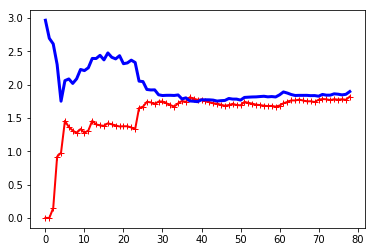

In [138]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [139]:
from sklearn.pipeline import Pipeline

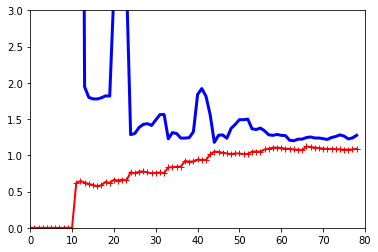

In [150]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show() 

In [154]:
from sklearn import datasets
iris = datasets.load_iris()

In [158]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [159]:
from sklearn.linear_model import LogisticRegression

In [161]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [162]:
X_new = np.linspace(0,3,1000)

In [164]:
X_new[:5]

array([0.        , 0.003003  , 0.00600601, 0.00900901, 0.01201201])

In [165]:
X_new = X_new.reshape(-1,1)

In [166]:
y_proba = log_reg.predict_proba(X_new)

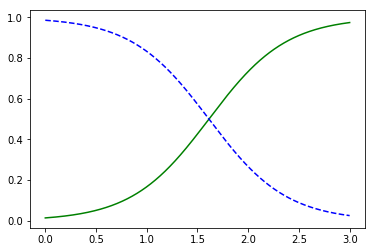

In [168]:
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")